![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Projeto 2: Integração adaptativa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 0: Os métodos

Inclua abaixo os métodos de integração do retângulo, do trapézio, do ponto médio e de Simpson.

In [2]:
def retangulo(f, a, b, n=1000):
    l, h = np.linspace(a, b, n, endpoint=False, retstep=True)
    soma = np.sum(f(l))
    return soma * h

def trapezio(f, a, b, n=1000):
    l, h = np.linspace(a, b, n, endpoint=False, retstep=True)
    soma = np.sum(f(l))
    correcao = - (f(b)-f(a))/2
    return (soma - correcao) * h

def midpoint(f, a, b, n=1000):
    l, h = np.linspace(a, b, n, endpoint=False, retstep=True)
    mids = l + h/2
    soma = np.sum(f(mids))
    return soma * h

def simpson(f, a, b, n=1000):
    l, h = np.linspace(a, b, n, endpoint=False, retstep=True)
    mids = l + h/2
    soma = 4*np.sum(f(mids)) + 2*np.sum(f(l))
    correcao = - (f(b)-f(a))
    return (soma - correcao) * h/6

In [3]:
methods = [retangulo, trapezio, midpoint, simpson]

In [4]:
exact = np.exp(2) - np.exp(0)
for method in methods:
    print(f"Erro usando {method.__name__:9s}: {method(np.exp, 0, 2) - exact: 7e}")

Erro usando retangulo: -6.386926e-03
Erro usando trapezio :  2.129685e-06
Erro usando midpoint : -1.064843e-06
Erro usando simpson  :  3.463896e-14


In [5]:
exact = np.exp(2) - np.exp(0)
tols = [1e-2, 4e-6, 2e-6, 1e-12]
for m, tol in zip(methods, tols):
    assert np.isclose(m(np.exp, 0, 2), exact, atol=tol)

# Parte 1: Integrais adaptativas

Uma das grandes dificuldades da integração numérica é saber
"quão pequenos devem ser os intervalos de integração".

Uma das respostas para esta questão é a seguinte:
"Até que reduzir mais ainda não faça tanta diferença".

Um método, por exemplo, aproxima a integral em $[a,b]$ com $N$ intervalos,
e depois, com $2N$ intervalos.

## Questão 1: Aumentando $N$

Para cada um dos métodos, faça um gráfico, mostrando, em função de $N$:
- o erro de $I_{N}$ até a integral exata
- o erro de $I_{2N}$ até a integral exata
- a diferença entre as integrais $I_N$ e $I_{2N}$.

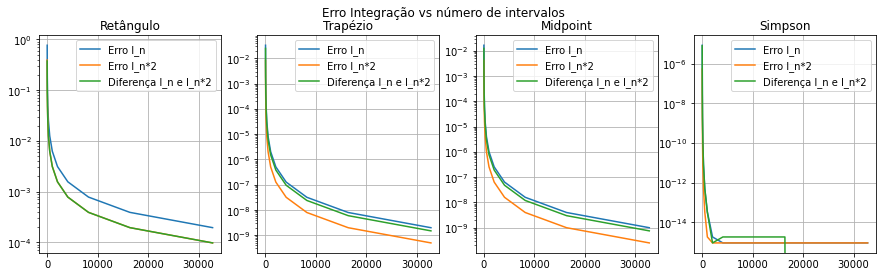

In [6]:
fig, axs = plt.subplots(ncols=4, figsize=(15,4))
Ns = 2**np.arange(3,16)
exact = np.exp(2) - np.exp(0)
nomes=["Retângulo","Trapézio","Midpoint","Simpson"]
for (ax,m,nome) in zip(axs, methods,nomes):
    y=[]
    y2=[]
    y3=[]
    for n in Ns:
        n = int(n)
        y.append( abs( m(np.exp, 0, 2, n) - exact ) )
        y2.append( abs ( m(np.exp, 0, 2, 2*n) - exact) )
        y3.append( abs ( (m(np.exp, 0, 2, n) - exact) - (m(np.exp, 0, 2, 2*n) - exact) ) )
        #y.append( m(np.exp, 0, 2, n) - exact ) 
        #y2.append( m(np.exp, 0, 2, 2*n) - exact) 
        #y3.append( (m(np.exp, 0, 2, n) - exact) - (m(np.exp, 0, 2, 2*n) - exact) ) 
    ax.plot(Ns, y, label="Erro I_n")
    ax.plot(Ns, y2, label="Erro I_n*2")
    ax.plot(Ns, y3, label="Diferença I_n e I_n*2")
    ax.set_title(nome)
    ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.grid()
    ax.legend()

plt.suptitle("Erro Integração vs número de intervalos");

O que você observa?

Além de convergir mais rapidamente, podemos ver que no Método de Simpson a partir de em torno de 1.7e+4 intervalos a diferença entre In e In\*2 tende a zero, mostrando que o valor da função tende a ficar igual com n ou 2n divisões.

Quantas subdivisões parecem ser necessárias para que o erro do método do trapézio cheguem em $10^{-14}$?

Da ordem de 1e+7 subdivisoes
1.5987211554602254e-14


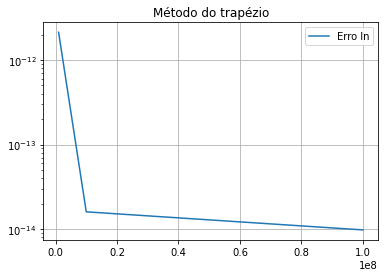

In [7]:
#Cuidado: cálculo lento, só tirei os '#' para visualizar a respota

print ("Da ordem de 1e+7 subdivisoes")
y = abs( trapezio(np.exp, 0, 2, 10000000) - exact )
print (y)
#Desenvolvimento (pode travar o pc):
Ns = 10**np.arange(6,9)
y=[]
y2=[]
y3=[]
for n in Ns:
    n = int(n)
    y.append( abs( trapezio(np.exp, 0, 2, n) - exact ) )
plt.plot(Ns, y, label="Erro In")
plt.title("Método do trapézio")
plt.grid()
plt.yscale('log')
plt.legend();

Agora, faça o mesmo estudo para uma outra função de sua escolha.

<ipython-input-8-7bb5e0d58d74>:30: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


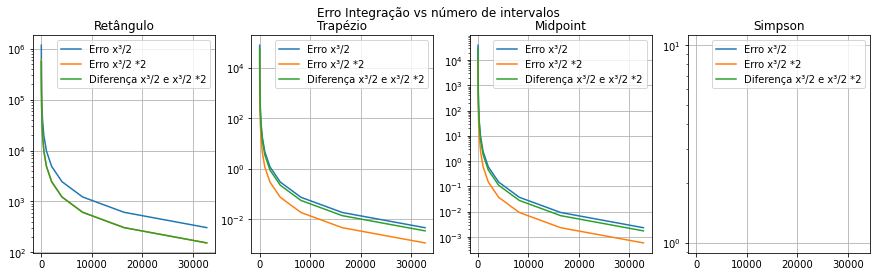

In [8]:
def f(x):
    return 0.2*np.power(x,3)
a2=0
b2=100

def primitiva_f(x):
    return 0.05*np.power(x,4)

exact2 = primitiva_f(b2) - primitiva_f(a2)

fig, axs = plt.subplots(ncols=4, figsize=(15,4))
Ns = 2**np.arange(3,16)
nomes=["Retângulo","Trapézio","Midpoint","Simpson"]
for (ax,m,nome) in zip(axs, methods,nomes):
    y=[]
    y2=[]
    y3=[]
    for n in Ns:
        n = int(n)
        y.append( np.abs( m(f, a2, b2, n) - exact2 ) )
        y2.append( np.abs( m(f, a2, b2, 2*n) - exact2) )
        y3.append( np.abs( (m(f, a2, b2, n) - m(f, a2, b2, 2*n)) ) )
        #y.append(  m(np.cos, 0, np.pi, n) - exact ) 
        #y2.append(  m(np.cos, 0, np.pi, 2*n) - exact) 
        #y3.append(  (m(np.cos, 0, np.pi, n) - exact) - (m(np.cos, 0, np.pi, 2*n) - exact) ) 
    ax.plot(Ns, y, label="Erro x³/2")
    ax.plot(Ns, y2, label="Erro x³/2 *2")
    ax.plot(Ns, y3, label="Diferença x³/2 e x³/2 *2")
    ax.set_title(nome)
    ax.set_yscale('log')
#     ax.set_xscale('log')
    ax.grid()
    ax.legend()

plt.suptitle("Erro Integração vs número de intervalos");

Explique a sua escolha.
Os resultados são similares ou diferentes?

A escolha de 0.2\*x foi para analisarmos uma função com uma menor variação quando comparada a exp(x). Podemos ver que o resultados são diferentes, uma vez que para os 4 métodos temos erros muito parecidos, não havendo tanta diferença na convergência. Vamos analisar os erros de integração para cada um dos métodos:
<p>
$
\begin{equation}
erro_{retângulo}  \leq (b-a)\max_{x \in [a,b]}|f(x)|\\
erro_{trapézio} \leq \frac{5(b-a)h^2\max_{x \in [a,b]}|f^{(2)}(x)|}{12}\\
erro_{ponto médio}  \leq \frac{7(b-a)h^2\max_{x \in [a,b]}|f^{(2)}(x)|}{24}\\
erro_{simpson} \leq \frac{49(b-a)h^4\max_{x \in [a,b]}|f^{(4)}(x)|}{2880}
\end{equation}
$
<p> 
Vemos das equações acima que, caso a função que queremos integrar não possua derivada quarta, isto é $f^{(4)}(x) = 0,  \forall x$, então todas terão um erro associado, exceto para o calculado por simpson. 

## Questão 2: Dobrando Simpson

Agora, escreva um método `simpson2(f, a, b, tol)` que calcula a integral de $f$ no intervalo $[a,b]$,
dobrando o número de subdivisões, até que a diferença entre uma integral e a seguinte fique abaixo de  `tol`.

- Qual integral você acha melhor retornar?
  $I_N$ ou $I_{2N}$?
- Retorne, também, o número de subdivisões final.

In [9]:
def simpson2(f, a, b, tol=1e-12):
    n = 1
    simpson1, simpson2 = simpson(f, a, b, n), simpson(f, a, b, 2*n)
    while True:
        l, h = np.linspace(a, b, n, endpoint=False, retstep=True)
        if n != 1:
            dif = simpson1 - simpson2
            if abs(dif) <= tol :
                break
        n=2*n
        simpson1, simpson2 = simpson2, simpson(f, a, b, 2*n)
    return simpson1, n

In [10]:
I, n = simpson2(np.exp, 0, 2)
assert np.isclose(I, np.exp(2) - 1)
assert n >= 64

In [11]:
I, n = simpson2(np.exp, 0, 2, tol=1)
assert n <= 8
assert np.isclose(I, np.exp(2) - 1, atol=1)
assert not np.isclose(I, np.exp(2) - 1)

In [12]:
I, n = simpson2(np.exp, 0, 2, tol=1e-14)
assert np.isclose(I, np.exp(2) - 1, atol=1e-14, rtol=1e-14)
assert n >= 64*32

Mas nem tudo é perfeito:
algumas funções podem "confundir" o dobrador:

In [13]:
def f(x): return np.sin(x)**2
simpson2(f, 0, 4*np.pi)

(6.283185307179589, 8)

Explique o que aconteceu.

Por a função ser periódica com o período se repetindo exatamente 4 vezes no intervalo, quando calcula-se com um ou dois intervalos, teremos valores de ponto médio e pontos iniciais próximos a zero, correspondente aos "vales" da função que se repetem.

Como você faria para calcular essa integral com precisão?
Descreva sua ideia abaixo, e faça os cálculos em seguida.

Podemos verificar se os pontos médios da função de um valor de N para N+1 são muito próximos. Caso forem, devemos continuar a iteração (função simpson2_modif abaixo).

In [14]:
def simpson2_modif(f, a, b, tol=1e-12):
    n = 1
    while True:
        l, h = np.linspace(a, b, n, endpoint=False, retstep=True)
        mids = l + h/2
        simpson = (4*np.sum(f(mids)) + 2*np.sum(f(l)) + (f(b)-f(a))) * h/6
        if n != 1:
            dif = simpson - simpson1
            l_ant = l
            if abs(dif) <= tol :
                #Verificação dos pontos médios
                if abs(f(mids[0])-f(mids1[0])) >= tol:
                    break
        simpson1 = simpson
        mids1 = mids
        n=2*n
    return simpson, n

r0 , n0 = simpson2_modif(f, 0, 4*np.pi)

#Outra alternativa:  divisão do intervalo em 3 (intervalos sem simetria)
r1 , n1 = simpson2(f, 0, 4*np.pi/3)
r2 , n2 = simpson2(f, 4*np.pi/3, 2*4*np.pi/3)
r3 , n3 = simpson2(f, 2*4*np.pi/3, 4*np.pi)
r = r1 + r2 + r3
r0, r

(6.283185307179587, 6.283185307179588)

Este mesmo método se aplica para calcular
$$ \int_0^{16\pi} \frac{\sin(x)^2}{\sqrt{1+x}} dx ? $$

Modifique o necessário para calcular essa integral!

In [15]:
def f(x):
    return np.sin(x)**2/np.sqrt(1+x)
r0 , n0 = simpson2_modif(f, 0, 16*np.pi)

#Outra alternativa:  divisão do intervalo em 3 (intervalos sem simetria)
r1 , n1 = simpson2(f, 0, 16*np.pi/3)
r2 , n2 = simpson2(f, 16*np.pi/3, 2*16*np.pi/3)
r3 , n3 = simpson2(f, 2*16*np.pi/3, 16*np.pi)
r = r1 + r2 + r3
r0, r

(6.11739035743209, 6.117390357431492)

O que ficou diferente
- para você?
- para o programa?

Para o usuário: tem que chamar a função simpson2_modif
Para o programa: Ele verifica se os pontos médios da função de um valor de N para N+1 são muito próximos. Caso forem, ele continua a iteração.

## Questão 3: Dobrando Simpson aos poucos

Se usarmos um intervalo de integração grande,
pode ser que a variação da função em uma parte seja bem menor do que em outra,
e daí seria mais importante "refinar" o método apenas na parte onde a função varia mais.

Para fazer isso, vamos usar uma abordagem **recursiva**:
1. calculamos a integral no intervalo $[a,b]$ com 1 e com 2 subdivisões
2. se ambas as integrais estiverem suficientemente próximas, terminamos:
    - retornamos a aproximação, e "2" para o número de subdivisões
3. senão, calculamos recursivamente a integral em $[a,m]$ e $[m,b]$,
    - e retornamos a soma das integrais, além da soma do número de subdivisões para cada metade.

Explique porque, ao calcular recursivamente, é importante dividir a tolerência por 2.

Suponha que começamos com um erro $\epsilon_0$. Fazemos a avaliação e verificamos que a diferença entre a integral no intervalo [a,b] e a soma das integrais [a,m] + [m,b] é superior a tolerância. Portanto devemos efetuar a chamada recursiva. Caso não dividíssimos por 2 a tolerância, seria possível que somando os erros da integral da esquerda com a da direita tivéssemos um $\epsilon_{final} > \epsilon_0$. 

In [16]:
def simpson_rec(f, a, b, tol=1e-8):
    sub_1 = simpson(f,a,b,1)
    m = (a+b)/2
    sub_2 = simpson(f,a,m,1) + simpson(f,m,b,1)
    if(np.abs(sub_1 - sub_2) <= tol):
        return sub_2,2
    approx_left,n = simpson_rec(f, a, m, tol=tol/2) 
    approx_right,n_2 = simpson_rec(f,m,b,tol=tol/2)
    return approx_left + approx_right, n+ n_2

In [17]:
simpson_rec(np.sin, 0, np.pi, tol=1e-8)

(2.000000000270205, 124)

In [18]:
I, n = simpson_rec(np.exp, 0, 2)
assert np.isclose(I, np.exp(2) - np.exp(0))
assert n >= 64

In [19]:
I, n = simpson_rec(np.exp, 0, 2, tol=1e-12)
assert np.isclose(I, np.exp(2) - np.exp(0), atol=1e-12, rtol=1e-12)
assert n >= 512

Faça um gráfico que mostre o erro real em função da tolerância passada,
tanto para o método recursivo como para o método "dobrador".

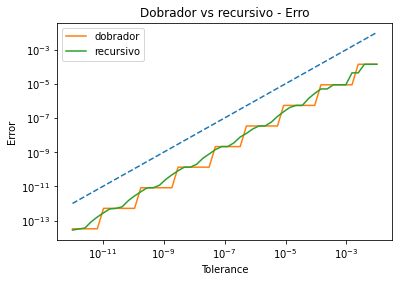

In [27]:
tols = np.logspace(-12,-2)
exact = np.exp(2) - np.exp(0)
erro_rec = []
erro_dob = []
n_rec = []
n_dob = []

for tol in tols:
    r, n = simpson_rec(np.exp, 0, 2, tol=tol)
    erro_rec.append(r - exact)
    n_rec.append(n)
    r, n = simpson2_modif(np.exp, 0, 2, tol=tol)
    erro_dob.append(r - exact) 
    n_dob.append(n)
plt.loglog(tols, tols, "--")
plt.plot(tols,erro_dob,label="dobrador")
plt.plot(tols,erro_rec,label="recursivo")
plt.xlabel("Tolerance")
plt.ylabel("Error")
plt.legend()
plt.title("Dobrador vs recursivo - Erro")
ax = plt.gca()

In [28]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 2

In [29]:
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Os métodos cumprem o que prometem?

Sim, vemos que ambos os métodos possuem erros abaixo da tolerância passada aumentando a quantidade iterações conforme menor a tolerância.

Agora, faça um gráfico do número de subdivisões utilizadas por cada método, em função da tolerância.

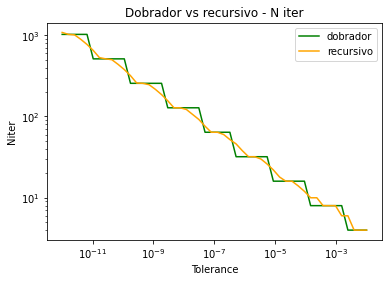

In [30]:
tols = np.logspace(-12,-2)
exact = np.exp(2) - np.exp(0)

erro_rec = []
erro_dob = []
n_rec = []
n_dob = []
# fig,axs = plt.subplots(2)
# fig.set_size_inches(16,8)
for tol in tols:
    r, n = simpson_rec(np.exp, 0, 2, tol=tol)
    erro_rec.append(r - exact)
    n_rec.append(n)
    r, n = simpson2_modif(np.exp, 0, 2, tol=tol)
    erro_dob.append(r - exact) 
    n_dob.append(n)
plt.plot(tols,n_dob,label="dobrador", color = "green")
plt.plot(tols,n_rec,label="recursivo", color = "orange")
plt.legend()
plt.title("Dobrador vs recursivo - N iter")
plt.xlabel("Tolerance")
plt.ylabel("Niter")
plt.loglog()
ax = plt.gca()

In [31]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Repita ambos os gráficos, para outra função, em outro intervalo.

<ipython-input-32-f41a34fb5bae>:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[0].loglog(tols, tols, "--")


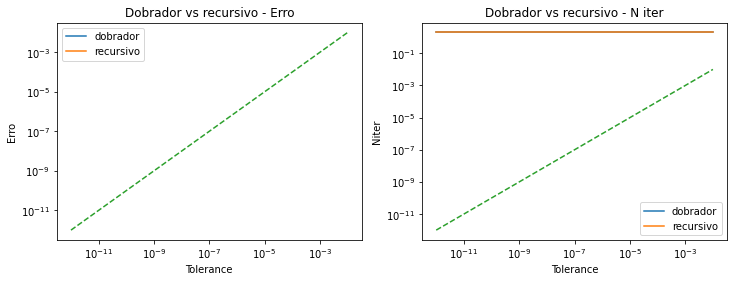

In [32]:
tols = np.logspace(-12,-2)
def f(x):
    return 0.2*np.power(x,3)
a2=0
b2=100
def primitiva_f(x):
    return 0.05*np.power(x,4)

fig, axs = plt.subplots(ncols=2, figsize=(12,4))
erro_rec = []
erro_dob = []
n_rec = []
n_dob = []
for tol in tols:
        r, n = simpson_rec(f, 0, 2, tol=tol)
        erro_rec.append(r - exact)
        n_rec.append(n)
        r, n = simpson2_modif(f, 0, 2, tol=tol)
        erro_dob.append(r - exact) 
        n_dob.append(n)
axs[1].plot(tols,n_dob,label="dobrador")
axs[1].plot(tols,n_rec,label="recursivo")
axs[1].legend()
axs[1].set_title("Dobrador vs recursivo - N iter")
axs[1].set_xlabel("Tolerance")
axs[1].set_ylabel("Niter")
axs[1].loglog(tols, tols, "--")
axs[0].plot(tols,erro_dob,label="dobrador")
axs[0].plot(tols,erro_rec,label="recursivo")
axs[0].legend()
axs[0].set_xlabel("Tolerance")
axs[0].set_ylabel("Erro")
axs[0].set_title("Dobrador vs recursivo - Erro")
axs[0].loglog(tols, tols, "--")
ax = plt.gca()

Estes métodos parecem equivalentes ou não?

Parecem equivalentes, contudo o simpson recursivo aparenta ter uma queda do erro mais constante, enquanto o dobrador tem uma queda em degraus. Isso revela que o dobrador tem um limiar maior a se adaptar, enquanto o recursivo aparenta a se adaptar mais facilmente mesmo para poucas variações da tolerância.

# Parte 2: Funções pseudo-periódicas

Vamos continuar combinando inteligência computacional e humana.
Aqui, vamos usar nosso conhecimento de uma função para usar os métodos de integração "após umas contas".

## Questão 4: Mudança de variáveis

A função $g(x) = \sin(x^2)$ não é periódica, mas tem uma componente oscilatória importante.
Dê a função $h(u)$, que corresponde ao integrando de uma mudança de variáveis tal que
$$ \int_a^b g(x) \, dx = \int_{a^2}^{b^2} h(u) \, du.$$

In [33]:
def g(x):
    return np.sin(x**2)

In [34]:
def h(y):
    return np.sin(y)/(2*np.sqrt(y))

In [35]:
h(1)

0.42073549240394825

In [36]:
assert np.isclose(h(1), 0.42073549240394825)

In [37]:
assert np.abs(h(np.pi)) < 1e-15

Faça um gráfico de $h$, no intervalo $[1, 20]$.

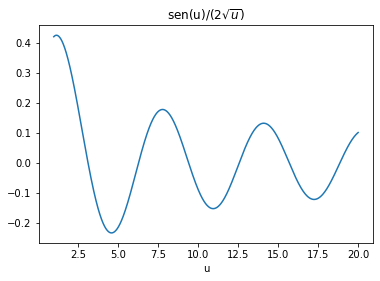

In [56]:
xs = np.linspace(1,20,1000)
plt.plot(xs,h(xs))
plt.title("sen(u)/($2\sqrt{u}$)")
plt.xlabel("u")
ax = plt.gca()

In [39]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

In [40]:
l = ax.lines[0]
assert min(l.get_xdata()) == 1
assert max(l.get_xdata()) == 20

## Questão 5: Erros de integração

Vamos observar como os métodos de integração se comportam quando integramos $g$ ou $h$.
Para isso, vamos precisar de um integrador (numérico!) suficientemente preciso.
Por simplicidade, vamos integrar a função $g$.

In [80]:
def G(a,b):
    """Integral de  sin(x^2)  no intervalo [a,b], com bastante precisão"""
    return simpson_rec(g,a,b,tol=1e-10)[0]

In [81]:
assert np.isclose(G(1,2),    0.49450818762037513)
assert np.isclose(G(20,33), -0.006737045607890843)

Calcule a integral de $g$ no intervalo $[1,2]$ e a correspondente integral de $h$ em $[1,4]$,
para a tolerância padrão `1e-8`,
usando algum dos métodos adaptativos que vimos.

Qual o erro de cada um dos métodos?
Em quantos pontos cada um calcula?

In [82]:
r,n = simpson_rec(g,1,2)
exact = G(1,2)
print(f"{exact-r:8e}",n)

-1.309354e-10 106


In [83]:
r,n=simpson_rec(h,1,4)
print(exact-r,n)

-4.717853885338741e-11 82


Percebe-se que tivemos um erro uma ordem de grandeza menor calculando a integral de "h". Não apenas isso, como também observamos que essa última levou menos iterações para atingir esse erro.

O que acontece se pedirmos mais precisão? E menos?

In [45]:
import pandas as pd

def get_integracao_tol(g, h, a, b,tols, tabela = False):
    err_g = []
    npts_g = []
    err_h = []
    npts_h = []
    exact = G(a,b)
    for tol in tols:
        g_r, g_n = simpson2(g,a,b, tol = tol)
        h_r, h_n = simpson2(h,a**2,b**2, tol = tol)
        
        err_h.append(abs(exact - h_r))
        err_g.append(abs(exact - g_r))
        npts_h.append(h_n)
        npts_g.append(g_n)
    
    if tabela == True:
        for i in range(len(tols)):
            print( f"Tol: {tols[i]:10e}     Err_g: {err_g[i]:15e}     N_g: {npts_g[i]:6}     Err_h: {err_h[i]: 15e}     N_h: {npts_h[i]:4}" )
        
    erros = pd.DataFrame({"Função g": err_g,
                       "Função h": err_h,
                        "Tols": tols.astype(str)})
    erros.set_index('Tols', inplace = True)
    
    num = pd.DataFrame({"Função g": npts_g,
                        "Função h": npts_h,
                        "Tols": tols.astype(str)})
    num.set_index("Tols", inplace = True)
    
    return erros, num

In [46]:
def plot_integração_erros_nums(g, h, a, b, tols, log = True, tabela = False):
    erros, nums = get_integracao_tol(g, h, a, b, tols, tabela = tabela)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize = [15,7])

    erros.plot(kind = "line", logy = log, ax = axs[0]);
    axs[0].set_title(f"Erro em relação à tolerância | intervalo {[round(a,2),round(b,2)]}");

    nums.plot(kind = "line", logy = log, ax = axs[1]);
    axs[1].set_title(f"Numero de pontos calculados | intervalo {[round(a,2),round(b,2)]}");

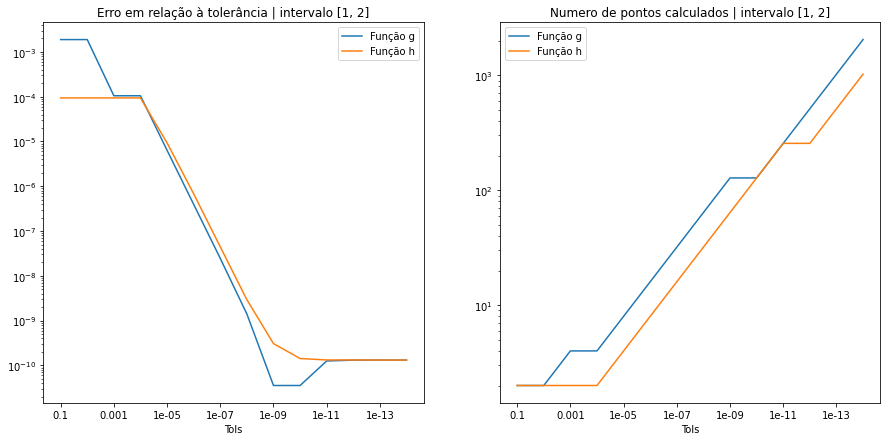

In [47]:
a, b = 1, 2
tols = np.array([1e-1, 1e-2, 1e-3,  1e-4,1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14])   

plot_integração_erros_nums(g, h, a, b, tols)

Quais diferenças você observa entre integrar $g$ ou $h$?

Ambas as funções apresentam comportamento similar, uma vez que ambas tem uma diminuição exponencial dos seus erros e um aumento eponencial da quantidade de pontos calculados, com um aumento da tolerância, conforme inficam os gráficos. 

Porém, é evidente que, considerando mesmas tolerências, a função $h$ apresenta um resultado mais exato, isto é, mais próximo do valor analítico da integral, calculado a partir de séries de potência, e com menos pontos sendo calculados.

Assim, conclui-se que usar a função na forma $h$ é mais eficiente do que usar a função na forma $g$.

## Questão 6: Explorando os períodos

Agora, vamos integrar num intervalo que corresponde a um "período" de $g$:
$[\sqrt{\pi}, \sqrt{2\pi}]$.

Repita os estudos feitos na questão anterior.

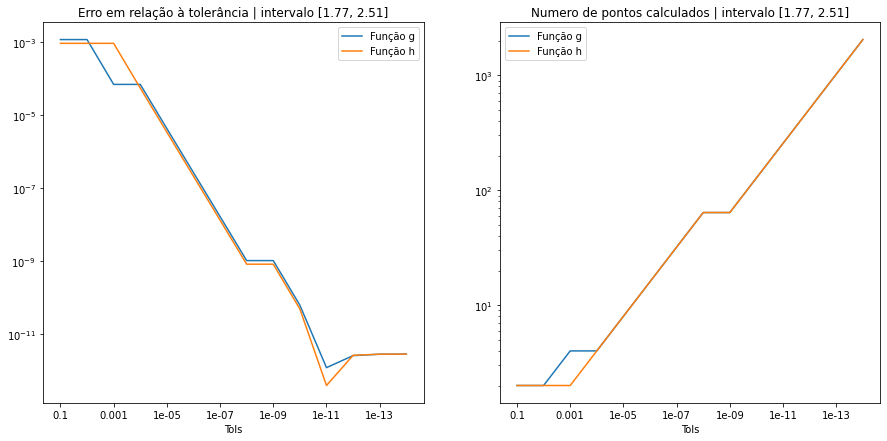

In [48]:
a, b  = np.sqrt(np.pi), np.sqrt(2*np.pi) 
tols = np.array([1e-1, 1e-2, 1e-3,  1e-4,1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14])    

plot_integração_erros_nums(g, h, a, b, tols)

Neste caso, há mais ou menos diferença entre os métodos?

Nesse caso há menos diferença entre os métodos.

Para lidar com os zeros periódicos de $h$,
escreva a função `multiint(f, intervals, tol)`, que retorna:
- a soma das integrais de $f$ em cada um dos intervalos
  (uma lista de pares, com as extremidades iniciais e finais);
- bem como o número total de subdivisões efetuadas.

Lembre de dividir a tolerância pelo número de intervalos, ao chamar o integrador em cada um deles ;-)

In [49]:
def multiint(f, intervals, tol=1e-8):
    tol = tol/len(intervals)
    n=0
    approx = 0
    for interval in intervals:
        r_parc,n_parc = simpson_rec(f,interval[0],interval[1],tol)
        approx += r_parc
        n += n_parc
    return approx, n

In [50]:
I = multiint(np.sin, [(0, np.pi), (2*np.pi, 3*np.pi), (4*np.pi, 5*np.pi)])
assert np.isclose(I[0], 6, atol=1e-8, rtol=1e-8)
assert I[1] > 3*32

In [51]:
I = multiint(np.sin, [(0, np.pi), (np.pi, 2*np.pi), (2*np.pi, 8)])
assert np.isclose(I[0], 1 - np.cos(8), atol=1e-8, rtol=1e-8)
assert I[1] > 100

In [98]:
np.sqrt(2*np.pi) 

2.5066282746310002

Agora, estude como os erros de integral de $g$ e $h$ se comportam,
para intervalos com mais "períodos".

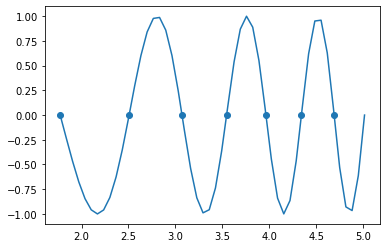

In [100]:
xs = [np.sqrt(n*np.pi) for n in range(1,8,)]
y = [g(x) for x in xs]
plt.scatter(xs,y)
xs = np.linspace(np.sqrt(np.pi),np.sqrt(8*np.pi))
y = [g(x) for x in xs]   
plt.plot(xs,y)

In [103]:
xs = [np.sqrt(n*np.pi) for n in range(1,8)]
tuples = []
for i in range(1,int(len(xs)/2)):
    tuples.append((xs[i],xs[i+1]))
# multiint(g, [(xs[]), , (4*np.pi, 5*np.pi),(6*np.pi, 7*np.pi), (7*np.pi,8*np.pi)])

In [104]:
tuples

[(2.5066282746310002, 3.0699801238394655),
 (3.0699801238394655, 3.5449077018110318)]

In [53]:
multiint(h, [(0, (np.pi)**2), ( (2*np.pi)**2, (3*np.pi)**2), ((4*np.pi)**2, (5*np.pi)**2),
             ((6*np.pi)**2, (7*np.pi)**2), ((7*np.pi)**2,(8*np.pi)**2)])

<ipython-input-34-359fe0e95f0a>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.sin(y)/(2*np.sqrt(y))
<ipython-input-34-359fe0e95f0a>:2: RuntimeWarning: invalid value encountered in double_scalars
  return np.sin(y)/(2*np.sqrt(y))


RecursionError: maximum recursion depth exceeded while calling a Python object

Comente o comportamento dos dois métodos para esta nova situação.
O que você percebe?

YOUR ANSWER HERE

## Questão 7: Mantendo o integrando positivo

A função que estamos integrando é bastante oscilatória.
Após a mudança de variáveis, é possível somar a parte positiva com a negativa seguinte (ou vice-versa),
e reduzir a amplitude do integrando.

Faça um gráfico de $h$ e de $j(u) = h(u) + h(u + \pi)$ no intervalo $[1,20]$.

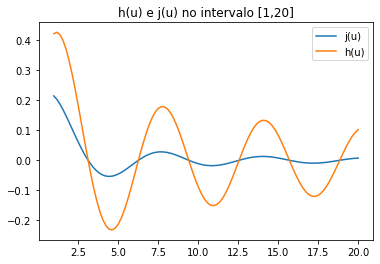

In [67]:
xs = np.linspace(1,20,100)
def j(u):
    return h(u) + h(u + np.pi)
y = j(xs)
y2 = h(xs)
plt.plot(xs,y,label="j(u)")
plt.plot(xs,y2,label="h(u)")
plt.legend()
plt.title("h(u) e j(u) no intervalo [1,20]")
ax = plt.gca()

In [68]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.title.get_text() != ""

In [69]:
l = ax.lines[0]
assert min(l.get_xdata()) == 1
assert max(l.get_xdata()) == 20

Faça, também, gráficos separados no intervalo $[6\pi,60\pi]$ para $h$ e $j$.

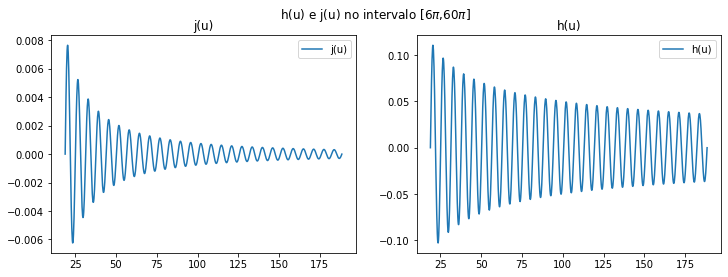

In [70]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
(ax1, ax2) = axs
xs = np.linspace(6*np.pi,60*np.pi,1000)
y = j(xs)
y2 = h(xs)

fig.suptitle("h(u) e j(u) no intervalo [6$\pi$,60$\pi$]")
axs[0].plot(xs,y,label="j(u)")
axs[0].legend()
axs[0].set_title("j(u)")
axs[1].plot(xs,y2,label="h(u)")
axs[1].legend()
axs[1].set_title("h(u)")

ax = plt.gca()

In [71]:
for ax in axs:
    assert len(ax.lines) == 1
    assert ax.title.get_text() != ""

O que você nota do comportamento de $h$ e $j$?

Agora, compare integrar
- $g$ no intervalo $[\sqrt{6\pi}, \sqrt{30\pi}]$,
- $h$ no intervalo $[6\pi, 30\pi]$,
- $j$ nos intervalos correspondentes

Para isto, calcule os erros e números de subdivisões usados para vários valores da tolerância,
e faça um gráfico do erro em função do número de subdivisões.

In [72]:
def get_erros_j(j, a, b, tols, tabela = False, log = True):
    err_j = []
    npts_j = []
    exact = G(a,b)

    for tol in tols:
        j_r, j_n = simpson2(j, a**2, b**2, tol)
        
        err_j.append(abs(exact - j_r))
        npts_j.append(j_n)
    
    if tabela == True:
        for i in range(len(tols)):
            print( f"Tol: {tols[i]:10e}     Err_g: {err_j[i]:15e}     N_g: {npts_j[i]:6}")
        
    erros = pd.DataFrame({"Função j": err_j,
                        "Tols": tols.astype(str)})
    erros.set_index('Tols', inplace = True)
    
    num = pd.DataFrame({"Função j": npts_j,
                        "Tols": tols.astype(str)})
    num.set_index("Tols", inplace = True)
    
    return erros, num

In [105]:
tols = np.array([1e-2,  1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14])
for tol in tols:
    print(simpson2(j, a**2, b**2, tol))

(-1.6106968180443252e-14, 2)
(-1.6106968180443252e-14, 2)
(-1.6106968180443252e-14, 2)
(-1.6106968180443252e-14, 2)
(-1.6106968180443252e-14, 2)
(-1.6106968180443252e-14, 2)
(0.007630763565803728, 16384)


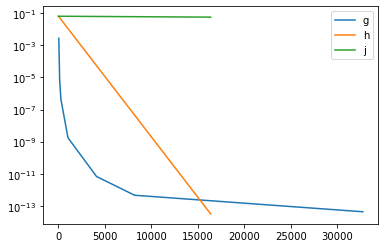

In [106]:
a, b = np.sqrt(6*np.pi), np.sqrt(30*np.pi)
I = G(a,b)
tols = np.array([1e-2,  1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14])

erros_gh, nums_gh = get_integracao_tol(g, h, a, b, tols)
#la linha abaixo só precisa colocar uma função que pegue os erros de j e os numeros de j nesse intervalo
erros_j, nums_j = get_erros_j(j, a, b, tols)

g_num = nums_gh["Função g"].to_numpy()
h_num = nums_gh["Função h"].to_numpy()
j_num = nums_j.to_numpy()

g_err = erros_gh["Função g"].to_numpy()
h_err = erros_gh["Função h"].to_numpy()
j_err = erros_j.to_numpy()

plt.semilogy(g_num, g_err, label = "g")
plt.semilogy(h_num, h_err, label = "h")
plt.semilogy(j_num, j_err, label = "j")

plt.legend()
#ax = plt.gca()

In [107]:
assert len(ax.lines) == 3

AssertionError: 

O que você observa agora?
A comparação do número de subdivisões é justa entre $h$ e $j$?

Não é justa, visto que os métodos apresentram diferentes limites de iterações para atingirem. Sendo assim, não faria sentido tal comparação, visto que algumas podem fazer mais iterações que outras.

Qual método você escolheria para estimar a integral de 0 a infinito de $g$?
Porquê?

No caso anterior, h se mostrou mais eficiente na redução do erro. Entretanto, quando aumentamos mais o intervalo, g se mostrou praticamente igual a h, no sgeundo gráfico estudado. A o aumentarmos mais ainda o intervalo, g parece ter chegado a um grau de precisão mais rapidamente, quando comparad aos métodos j e h. Sendo assim, eu 